In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Basic of ANN

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import Mean

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/kc_house_data/kc_house_data.csv")

df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

print(df.dtypes)
# df1 = df.astype({'grade':'object', 'condition': 'object', 'view': 'object'})
# print(df1.dtypes)

df['yr_built'] =  2022 - df['yr_built'] 

# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Check the new columns
print(df.columns.values)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


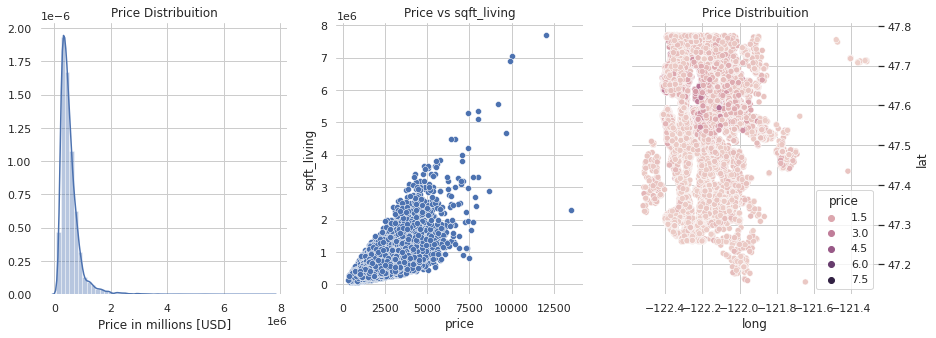

In [ ]:
sns.set(style="whitegrid", font_scale=1)

fig, axes = plt.subplots(1, 3,figsize=(15,5))

sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='sqft_living',y='price', data=df, ax=axes[1])
sns.scatterplot(x='long',y='lat', data=df, hue = "price", ax=axes[2])
sns.despine(bottom=True, left=True)

axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='price', ylabel='sqft_living', title='Price vs sqft_living')
# axes[1].yaxis.tick_right()
axes[2].set(xlabel='long', ylabel='lat', title='Price Distribuition')
axes[2].yaxis.tick_right()
axes[2].yaxis.set_label_position("right")

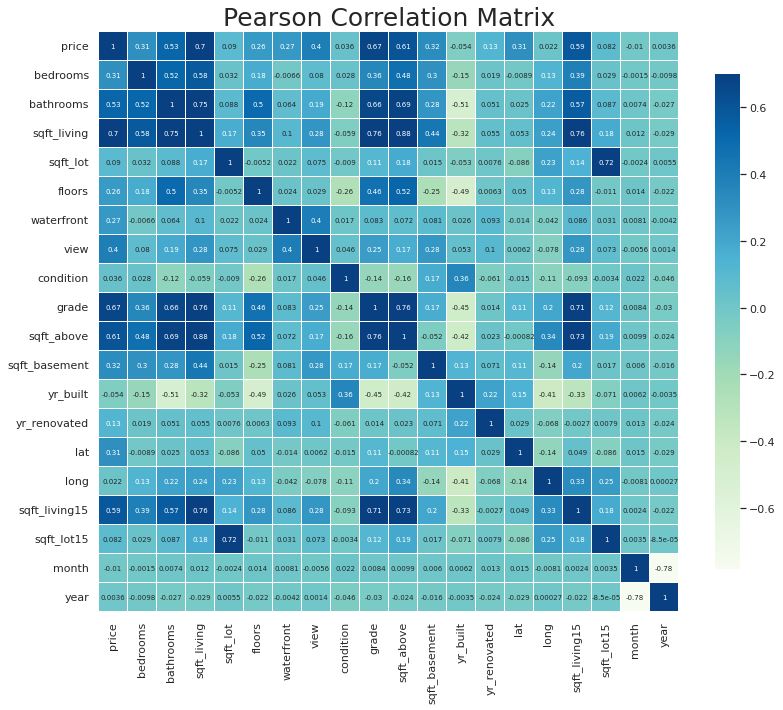

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

DecisionTreeRegressor

In [ ]:
df_model = DecisionTreeRegressor(random_state = 1) 
df_model.fit(X, y)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(df_model.predict(X.head()))

Making predictions for the following 5 houses:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  
0      1015.0       472.0         1.4936  
1      1129.0       463.0         1.8200  
2       333.0       117.0         1.6509  
3       515.0       226.0         3.1917  
4       624.0       262.0         1.9250  
The predictions are
[66900. 80100. 85700. 73400. 65500.]


In [ ]:
predicted_home_prices = df_model.predict(X)
print("mae: {}".format(mean_absolute_error(y, predicted_home_prices)))

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

print(train_X.shape)
print(val_y.shape)
print(train_X.shape)
print(val_y.shape)

df_model = DecisionTreeRegressor()

df_model.fit(train_X, train_y)

val_predictions = df_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

val_y.mean()

0.0

Sequence Model

In [ ]:
class My_Model(tf.keras.Model):
    def __init__(self):
        super(My_Model, self).__init__()
        
        
        self.d1 = Dense(19,activation='relu')
        
        self.d2 = Dense(19,activation='relu')
        self.d3 = Dense(19,activation='relu')
        self.d4 = Dense(19,activation='relu')

        self.d5 = Dense(1,activation='relu')
        
    # init에서 만든 layer를 불러와서 network 구성( 연산 파트 )
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        x = self.d5(x)

        return x

In [ ]:
keras.backend.clear_session()

model = My_Model() # model 클래스를 model 객체로 변경
# temp_inputs = keras.Input(shape=(-1, 1)) # model input image size
# model(temp_inputs) # model input
# model.summary() # 모델에 대한 요약 출력해줌

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128, epochs=200)

Epoch 1/200
119/119 [==============================] - 2s 10ms/step - loss: 423617232896.0000 - val_loss: 432965386240.0000
Epoch 2/200
119/119 [==============================] - 1s 8ms/step - loss: 422071566336.0000 - val_loss: 427512561664.0000
Epoch 3/200
119/119 [==============================] - 1s 9ms/step - loss: 400607707136.0000 - val_loss: 377603489792.0000
Epoch 4/200
119/119 [==============================] - 1s 10ms/step - loss: 300925779968.0000 - val_loss: 223047254016.0000
Epoch 5/200
119/119 [==============================] - 1s 8ms/step - loss: 144923361280.0000 - val_loss: 108491038720.0000
Epoch 6/200
119/119 [==============================] - 1s 8ms/step - loss: 97926430720.0000 - val_loss: 101569298432.0000
Epoch 7/200
119/119 [==============================] - 1s 9ms/step - loss: 95024676864.0000 - val_loss: 99099705344.0000
Epoch 8/200
119/119 [==============================] - 1s 10ms/step - loss: 92726501376.0000 - val_loss: 96608780288.0000
Epoch 9/200
119/11

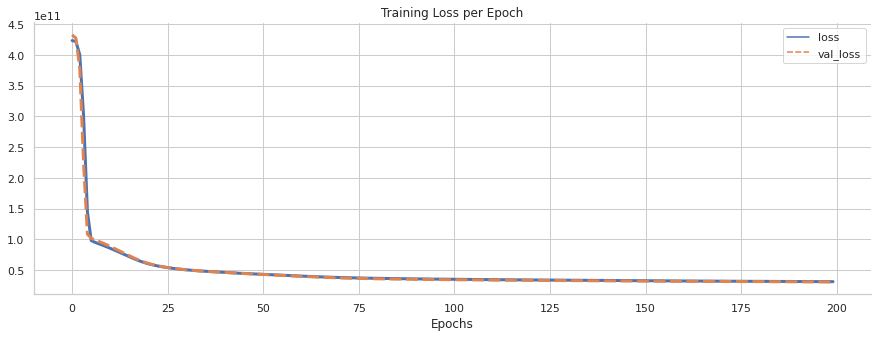

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test.values,predictions))
print('MSE: ',mean_squared_error(y_test.values,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test.values,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test.values,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

MAE:  107317.85797250926
MSE:  30557168571.21882
RMSE:  174806.0884844084
Variance Regression Score:  0.7823028578861152


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

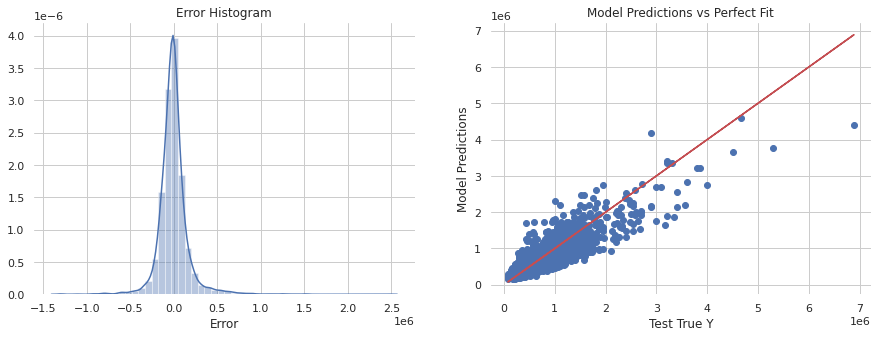

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol = 1e-3, random_state = 42) # max_iter -> epoch, tol -> training end
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

print(y_pred)

[1]


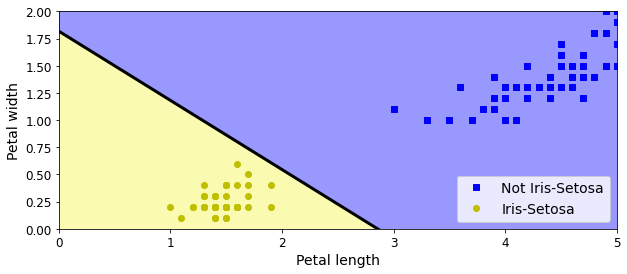

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

(-5.0, 5.0, -0.2, 1.2)

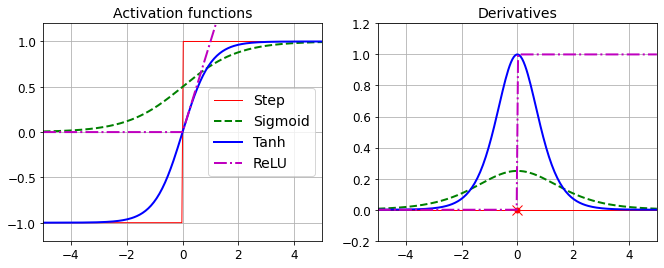

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

In [ ]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
uint8


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

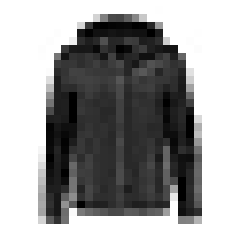

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

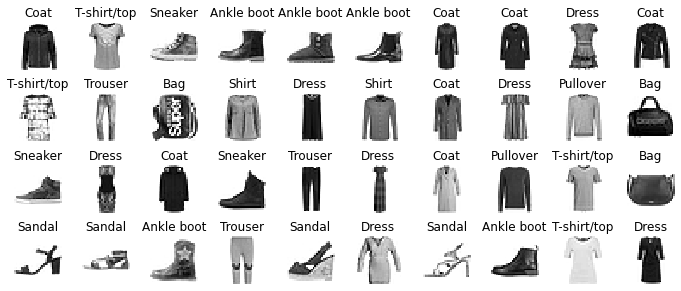

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # to classify

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


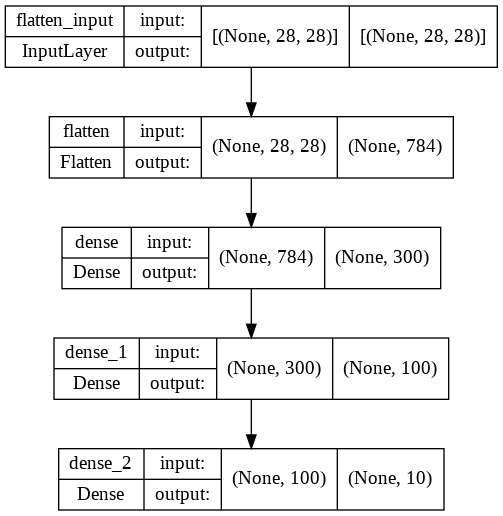

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
print(hidden1.name)

weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

dense
(784, 300)
(300,)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units = 30, activation = "relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation = activation)
    self.hidden2 = keras.layers.Dense(units, activation = activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2) # 보조출력: only connected to  hidden 1, 2 -> hidden 1, 2 not overfitting? 

    return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 2.1365 - output_1_loss: 1.9196 - output_2_loss: 4.0890 - val_loss: 1.6233 - val_output_1_loss: 0.8468 - val_output_2_loss: 8.6117
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.8905 - output_1_loss: 0.6969 - output_2_loss: 2.6326 - val_loss: 1.5163 - val_output_1_loss: 0.6836 - val_output_2_loss: 9.0109
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7429 - output_1_loss: 0.6088 - output_2_loss: 1.9499 - val_loss: 1.4639 - val_output_1_loss: 0.6229 - val_output_2_loss: 9.0326
Epoch 4/10
363/363 [==============================] - 3s 7ms/step - loss: 0.6771 - output_1_loss: 0.5691 - output_2_loss: 1.6485 - val_loss: 1.3388 - val_output_1_loss: 0.5481 - val_output_2_loss: 8.4552
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6381 - output_1_loss: 0.5434 - output_2_loss: 1.4911 - val_loss: 1.2177 - val_output_1_loss: 0.5194 - val_ou

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4382


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

model.save("/content/gdrive/MyDrive/Colab Notebooks/my_keras_model.h5")

Mounted at /content/gdrive/


In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks/my_keras_model.h5")

In [ ]:
model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/my_keras_model.h5" )
X_new = X_test[:3]
model.predict(X_new)

array([[0.54002357],
       [1.6505971 ],
       [3.009824  ]], dtype=float32)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/gdrive/MyDrive/Colab Notebooks/my_keras_model2.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/my_keras_model2.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4382


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4259 - val_loss: 0.3998
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4201 - val_loss: 0.4062
Epoch 3/10
363/363 [==============================] - 2s 7ms/step - loss: 0.4157 - val_loss: 0.3889
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4111 - val_loss: 0.3854
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3812
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.3784
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.3779
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.3731
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3950 - val_loss: 0.3693
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.3898


# House Price Advanced

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="whitegrid", font_scale=1)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



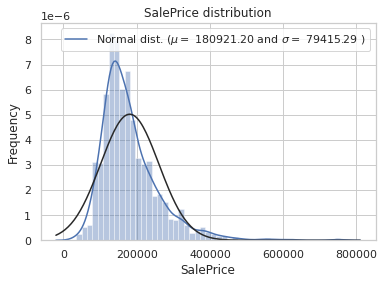

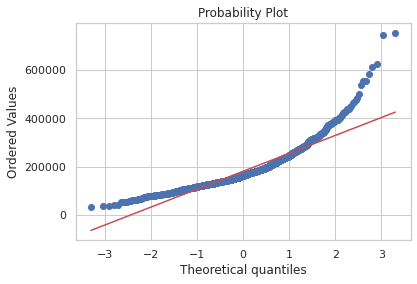

In [ ]:
sns.distplot(train["SalePrice"], fit = norm)

(mu, sigma) = norm.fit(train["SalePrice"])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### Log-transformation of the target variable - for the value to  be normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



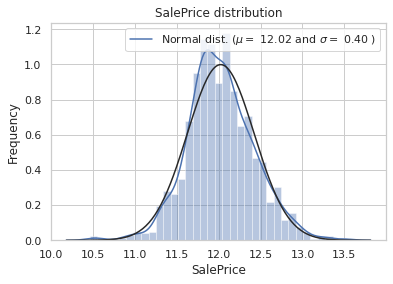

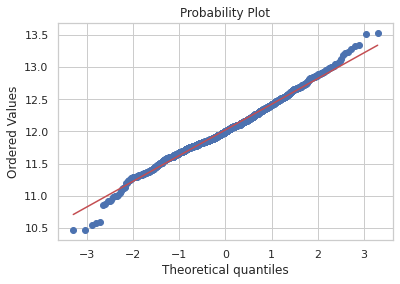

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(["SalePrice"], axis = 1, inplace = True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


In [ ]:
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

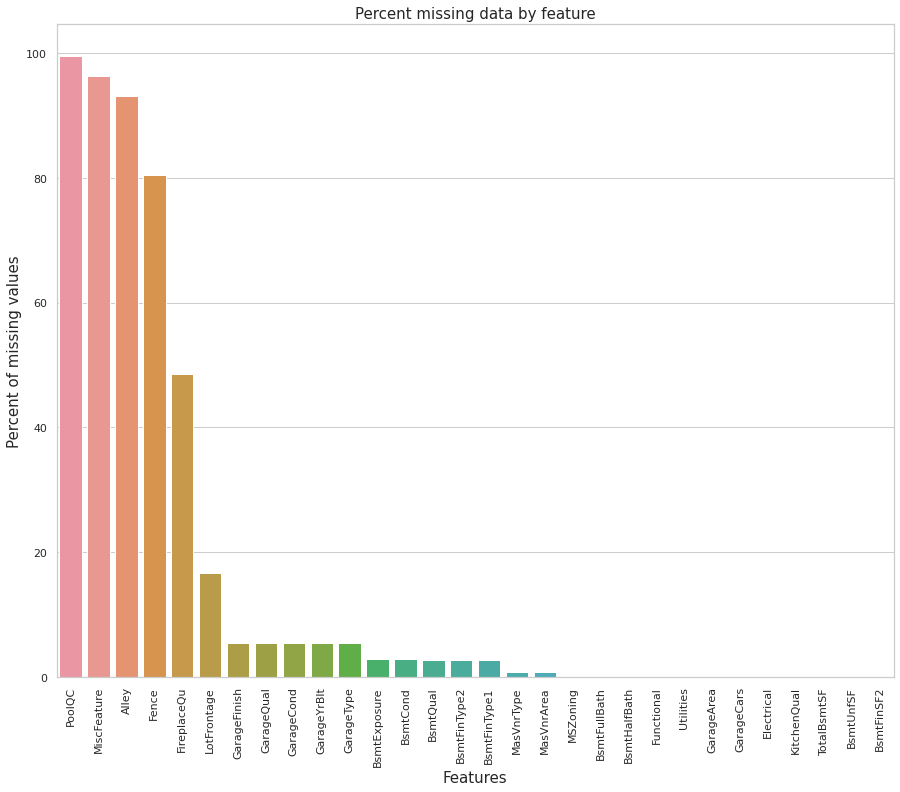

In [ ]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

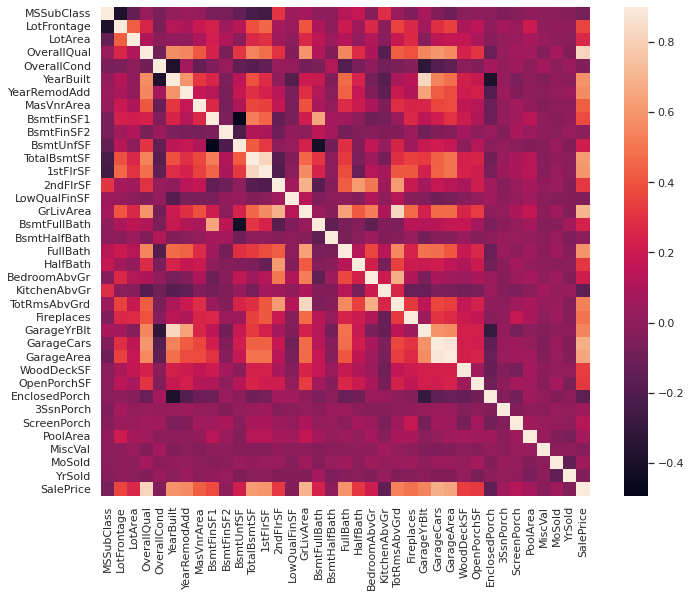

In [ ]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### Imputing missing values

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
  lbl = LabelEncoder()
  lbl.fit(list(all_data[c].values))
  all_data[c] = lbl.transform(list(all_data[c].values))

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({"Skew": skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
  all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 221)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
train.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/train_preprocessed.csv")
test.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/test_preprocessed.csv")
pd.DataFrame(y_train).to_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/y_train.csv")

#### Load Preprocessed Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="whitegrid", font_scale=1)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy import stats
from scipy.stats import norm, skew #for some statistics

Mounted at /content/gdrive/


#### Modellig

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="whitegrid", font_scale=1)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense

Mounted at /content/gdrive/


In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/train_preprocessed.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/test_preprocessed.csv")

train_original = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/train.csv")
y = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/house-prices-advanced-regression-techniques/y_train.csv")
y = y['0']

In [ ]:
n_folds = 5

def rmsle_cv(model):
  kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
  rmse = np.sqrt(-cross_val_score(model, train.values, y, scoring = "neg_mean_squared_error", cv = kf))
  return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = .9, random_state = 3))
KRR = KernelRidge(alpha = .6, kernel = "polynomial", degree = 2, coef0 = 2.5)

GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05, 
                                   max_depth = 4, max_features = "sqrt",
                                   min_samples_leaf = 15, min_samples_split = 10,
                                   loss = "huber", random_state = 5)

model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468,
                             learning_rate = 0.05, max_depth = 3,
                             min_child_weight = 1.7817, n_estimators = 2200,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             random_state = 7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1240 (0.0165)

ElasticNet score: 0.1241 (0.0166)

Kernel Ridge score: 0.1655 (0.0185)



In [ ]:
# Fail
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=42)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=[222]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])    

# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-5))
model.fit(X_train, y_train, epochs=30, validation_split= .1)

print("\nmodel loss: {}".format(model.evaluate(X_test, y_test)))

In [ ]:
drop_rate = 0.5
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=X_train.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_rate))
    model.add(Dense(384, activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_rate))
    model.add(Dense(352, activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_rate))
    model.add(Dense(448, activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_rate))
    model.add(Dense(160, activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_rate))
    model.add(Dense(160, activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = 'mse')
    return model

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
 
model = create_model()
model.summary()

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/gdrive/MyDrive/Colab Notebooks/ann_housing_model.h5", save_best_only=True)
history = model.fit(x=X_train,y=y_train,
          validation_split=0.1,
          batch_size=32,epochs=100, callbacks=[checkpoint_cb])

model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/ann_housing_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

print("best model mse: {}".format(mse_test))

### to do
 gridsearch

In [ ]:
X_train.isna().any()

Unnamed: 0               False
MSSubClass               False
LotFrontage              False
LotArea                  False
Street                   False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 222, dtype: bool

In [ ]:
# import keras_tuner as kt
# import Ipython
def model_builder(hp):
  model = keras.Sequential()

  # 첫번째 Dense 레이어 32~512까지 노드 수 조정 
  hp_unit = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(Dense(units = hp_unit, activation = "relu"))
  model.add(Dense(10, activation = 'softmax'))

	# 학습률(learning rate)을 조정[0.01, 0.001, 0.0001]
	# hp.choice: 그 list 안에서 뽑는다.
  hp_learning_rate = hp.Choice("learning_rate", values = [1e-2, 1e-3, 1e-4])

  opt = keras.optimizers.Adam(learning_rate = hp_learning_rate)
  loss = keras.losses.mean_squared_error()

  return model


tuner = kt.Hyperband(model_builder,
                     objective = "val_accuracy",
                     max_epochs = 10,
                     factor = 3,
                     directory = "my_dir",
                     project_name = "intro_to_kt")

class ClearTrainOutput(tf.keras.callbacks.Callback):
	def on_train_end(*arg, **kwargs):
		Ipython.display.clear_output(wait=True)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[ClearTrainOutput()])

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
최적화된 첫 번째 Dense 노드 수 : {best_hp.get('units')} 
최적화된  learnig rate : {best_hp.get('learning_rate')} 입니다.
""")


ModuleNotFoundError: ignored

# Tesnorflow: User Defined Model